1.Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

2.Loading the Dataset

In [2]:
df = pd.read_csv('/content/Copy of bankruptcy-prevention.csv')

3.Dataset Details

In [3]:
df.head()

industrial_risk   management_risk   financial_flexibility   credibility  \
0              0.5               1.0                     0.0           0.0   
1              0.0               1.0                     0.0           0.0   
2              1.0               0.0                     0.0           0.0   
3              0.5               0.0                     0.0           0.5   
4              1.0               1.0                     0.0           0.0   

    competitiveness   operating_risk       class  
0               0.0              0.5  bankruptcy  
1               0.0              1.0  bankruptcy  
2               0.0              1.0  bankruptcy  
3               0.0              1.0  bankruptcy  
4               0.0              1.0  bankruptcy

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [5]:
df.describe()

industrial_risk   management_risk   financial_flexibility  \
count       250.000000        250.000000              250.000000   
mean          0.518000          0.614000                0.376000   
std           0.411526          0.410705                0.401583   
min           0.000000          0.000000                0.000000   
25%           0.000000          0.500000                0.000000   
50%           0.500000          0.500000                0.500000   
75%           1.000000          1.000000                0.500000   
max           1.000000          1.000000                1.000000   

        credibility   competitiveness   operating_risk  
count    250.000000        250.000000       250.000000  
mean       0.470000          0.476000         0.570000  
std        0.415682          0.440682         0.434575  
min        0.000000          0.000000         0.000000  
25%        0.000000          0.000000         0.000000  
50%        0.500000          0.500000         0.500000  
75%        1.000000          1.000000         1.000000  
max        1.000000          1.000000         1.000000

* Missing values check

In [6]:
df.columns = df.columns.str.strip()

In [7]:
df.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(147)

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

Target variable

In [10]:
df['class'].value_counts()

class
non-bankruptcy    78
bankruptcy        25
Name: count, dtype: int64

In [11]:
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR

  outliers = df[(df[col] < lower) | (df[col] > upper)]
  print(f"{col}: {len(outliers)} outliers")


industrial_risk: 0 outliers
management_risk: 0 outliers
financial_flexibility: 0 outliers
credibility: 0 outliers
competitiveness: 0 outliers
operating_risk: 0 outliers


In [12]:
summary = df.describe()
summary = summary.loc[['mean', 'std']]
numeric_cols = df.select_dtypes(include=np.number)
summary.loc['median'] = numeric_cols.median()
summary.loc['IQR'] = numeric_cols.quantile(0.75) - numeric_cols.quantile(0.25)
print(summary)

        industrial_risk  management_risk  financial_flexibility  credibility  \
mean           0.485437         0.563107               0.504854     0.582524   
std            0.404971         0.412308               0.405206     0.377668   
median         0.500000         0.500000               0.500000     0.500000   
IQR            1.000000         1.000000               1.000000     0.500000   

        competitiveness  operating_risk  
mean           0.640777        0.514563  
std            0.410747        0.439788  
median         1.000000        0.500000  
IQR            0.500000        1.000000  


4.EDA

* Count Plots

1. Class Distribution Chart



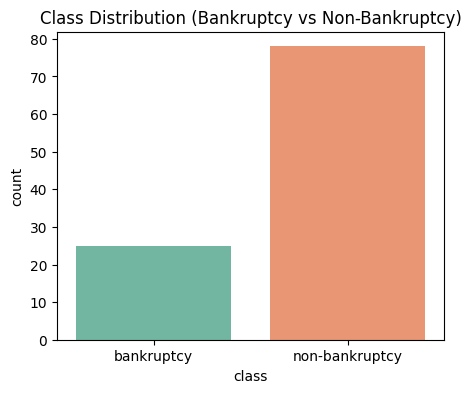

In [13]:
plt.figure(figsize=(5,4))
sns.countplot(x='class', data=df, palette='Set2')
plt.title("Class Distribution (Bankruptcy vs Non-Bankruptcy)")
plt.show()

The number of companies in each category of the target variable (bankruptcy vs non-bankruptcy).

2. Feature Distribution by Class

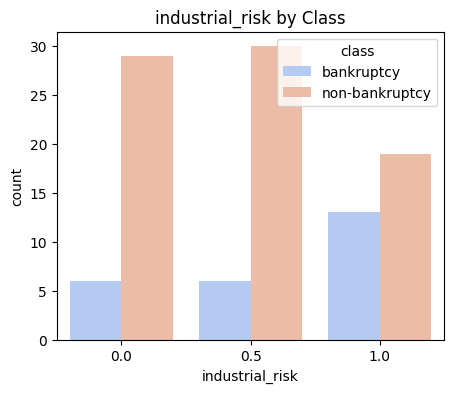

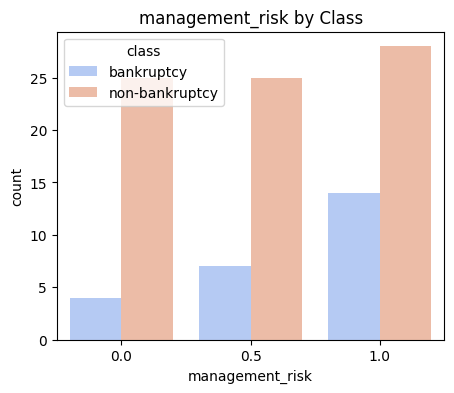

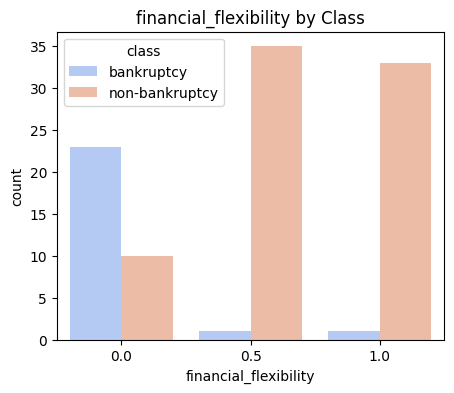

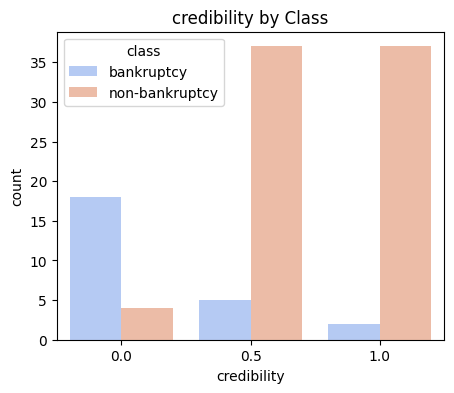

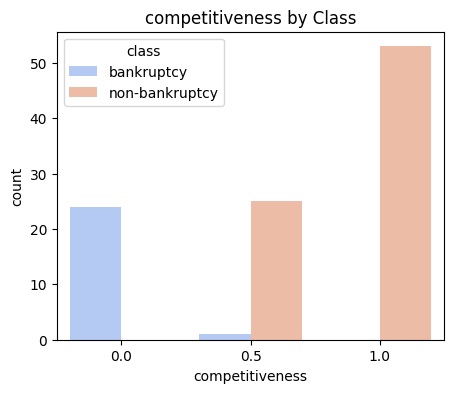

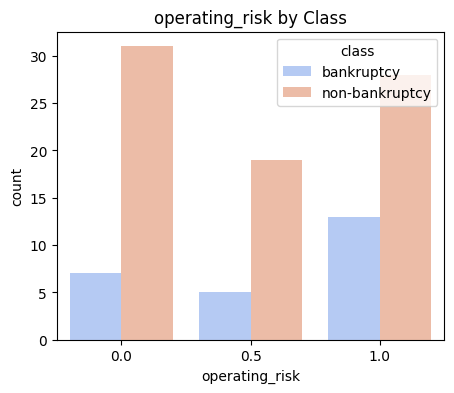

In [14]:
features = [col for col in df.columns if col != 'class']

for feature in features:
    plt.figure(figsize=(5,4))
    sns.countplot(x=feature, hue='class', data=df, palette='coolwarm')
    plt.title(f"{feature} by Class")
    plt.show()

For each risk factor (industrial_risk, management_risk, etc.), we see how many companies fall into each level (0, 0.5, 1) split by bankruptcy status.

Histograms

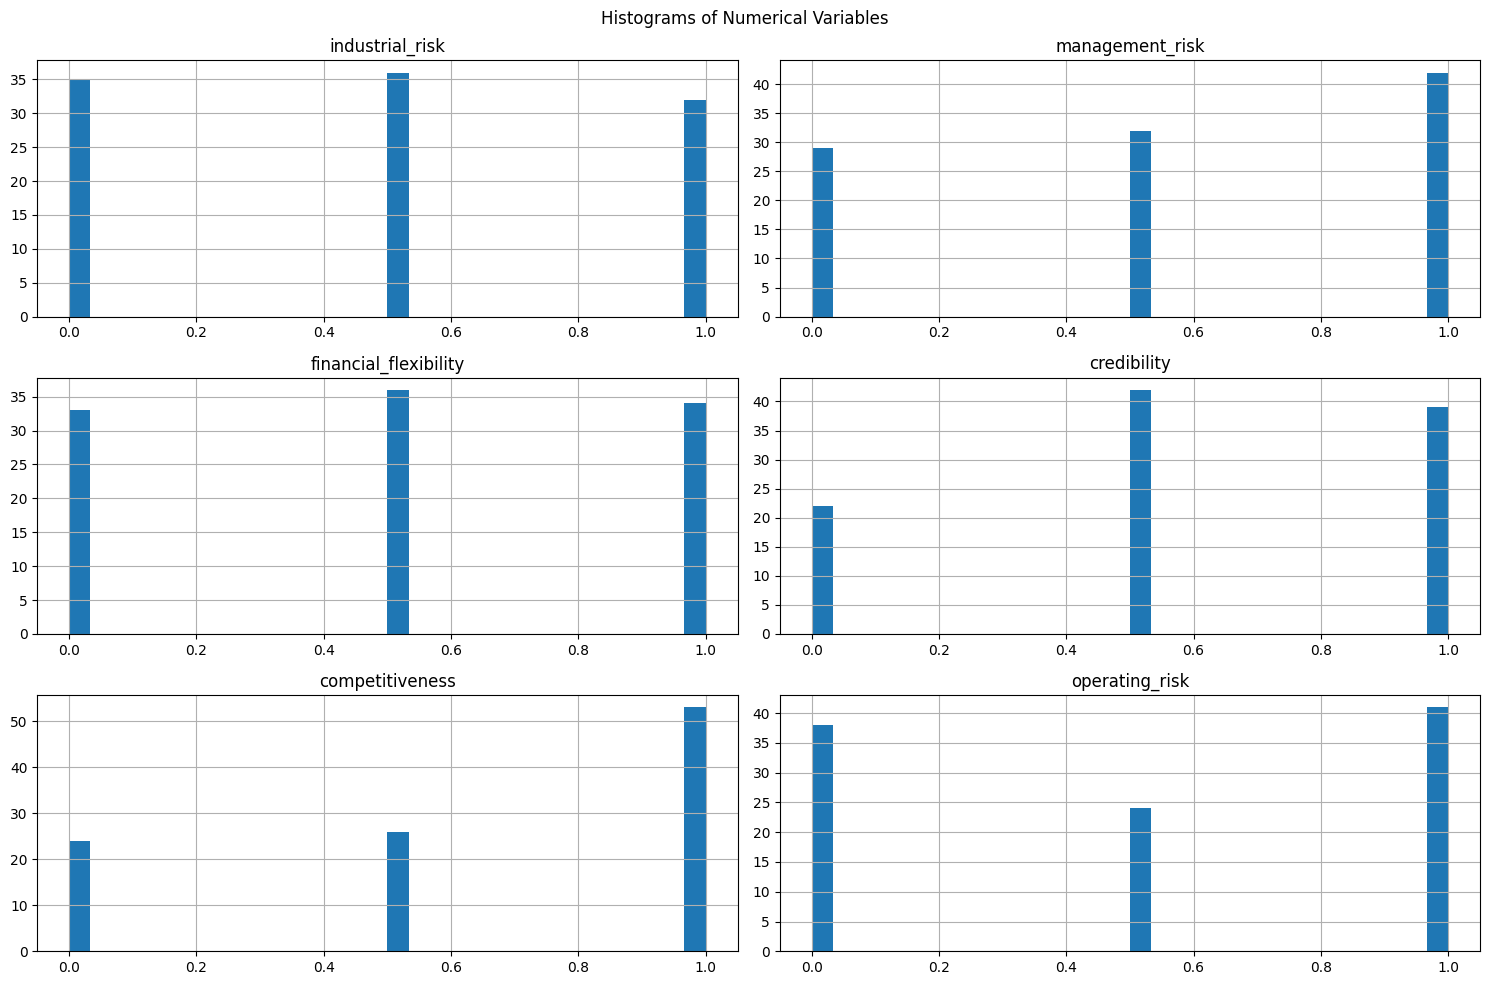

In [15]:
import matplotlib.pyplot as plt
df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Histograms of Numerical Variables")
plt.tight_layout()
plt.show()

Boxplots

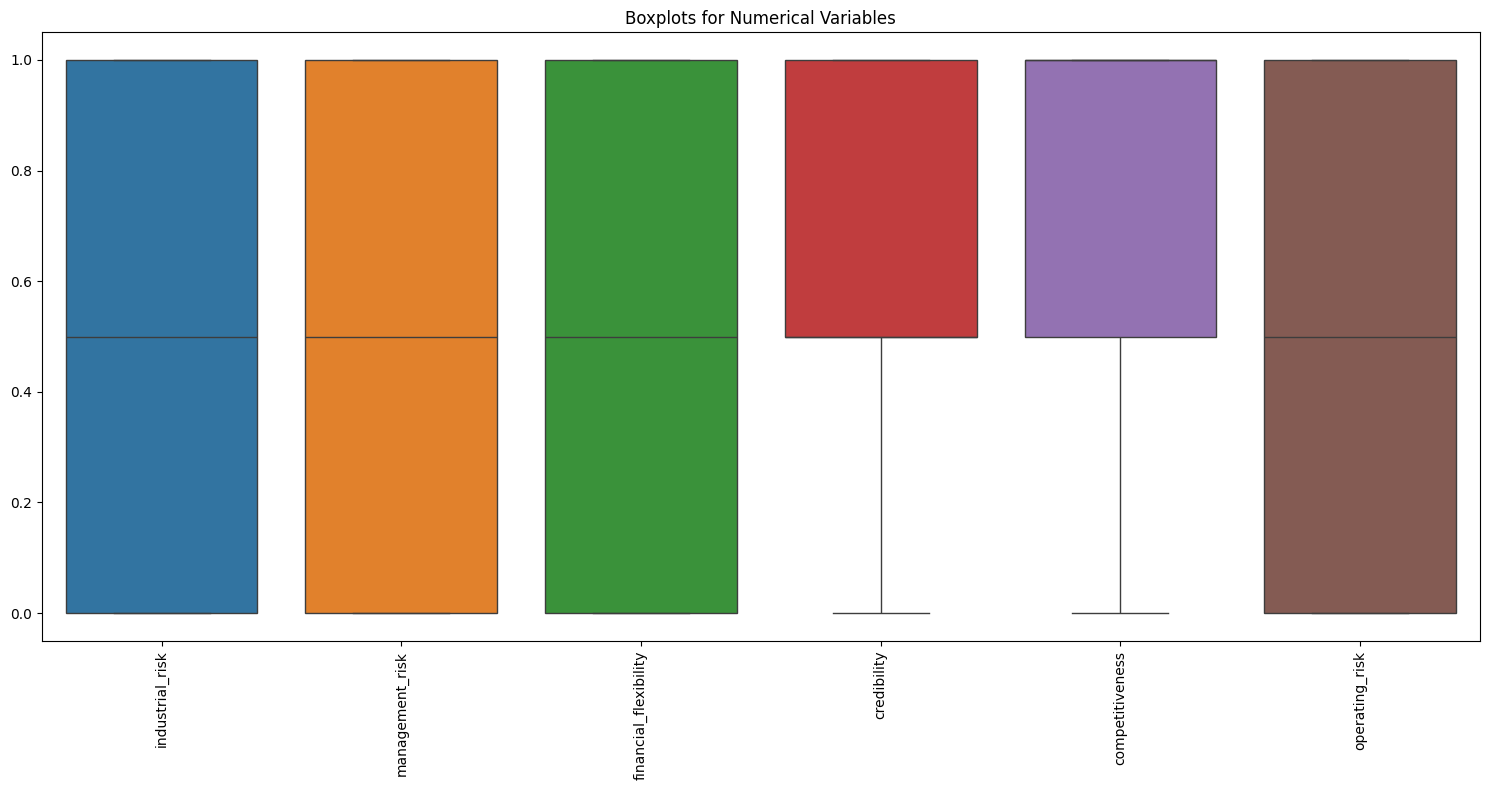

In [16]:
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title("Boxplots for Numerical Variables")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

* Heatmap

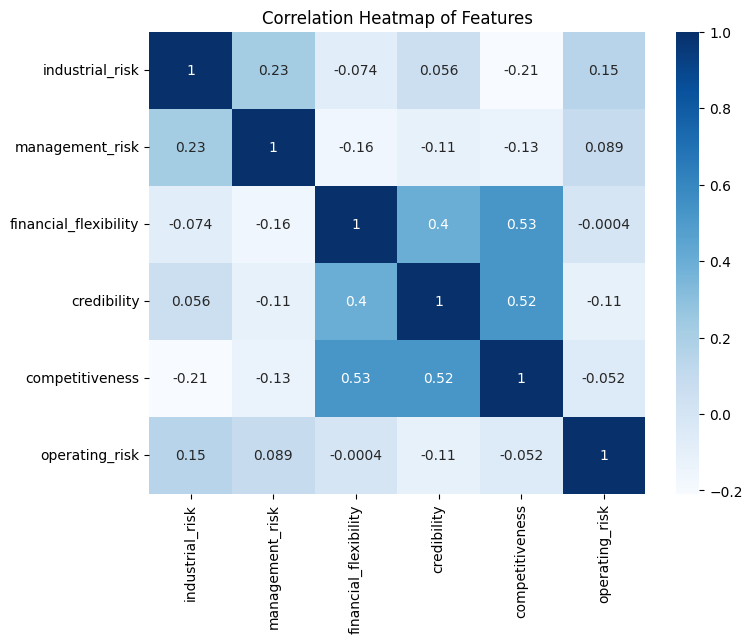

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df[features].corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap of Features")
plt.show()

Correlation values (from -1 to +1) between the numeric predictor variables.

Color intensity shows how strong the correlation is, with numbers on the grid for precision.

* Pair Plot

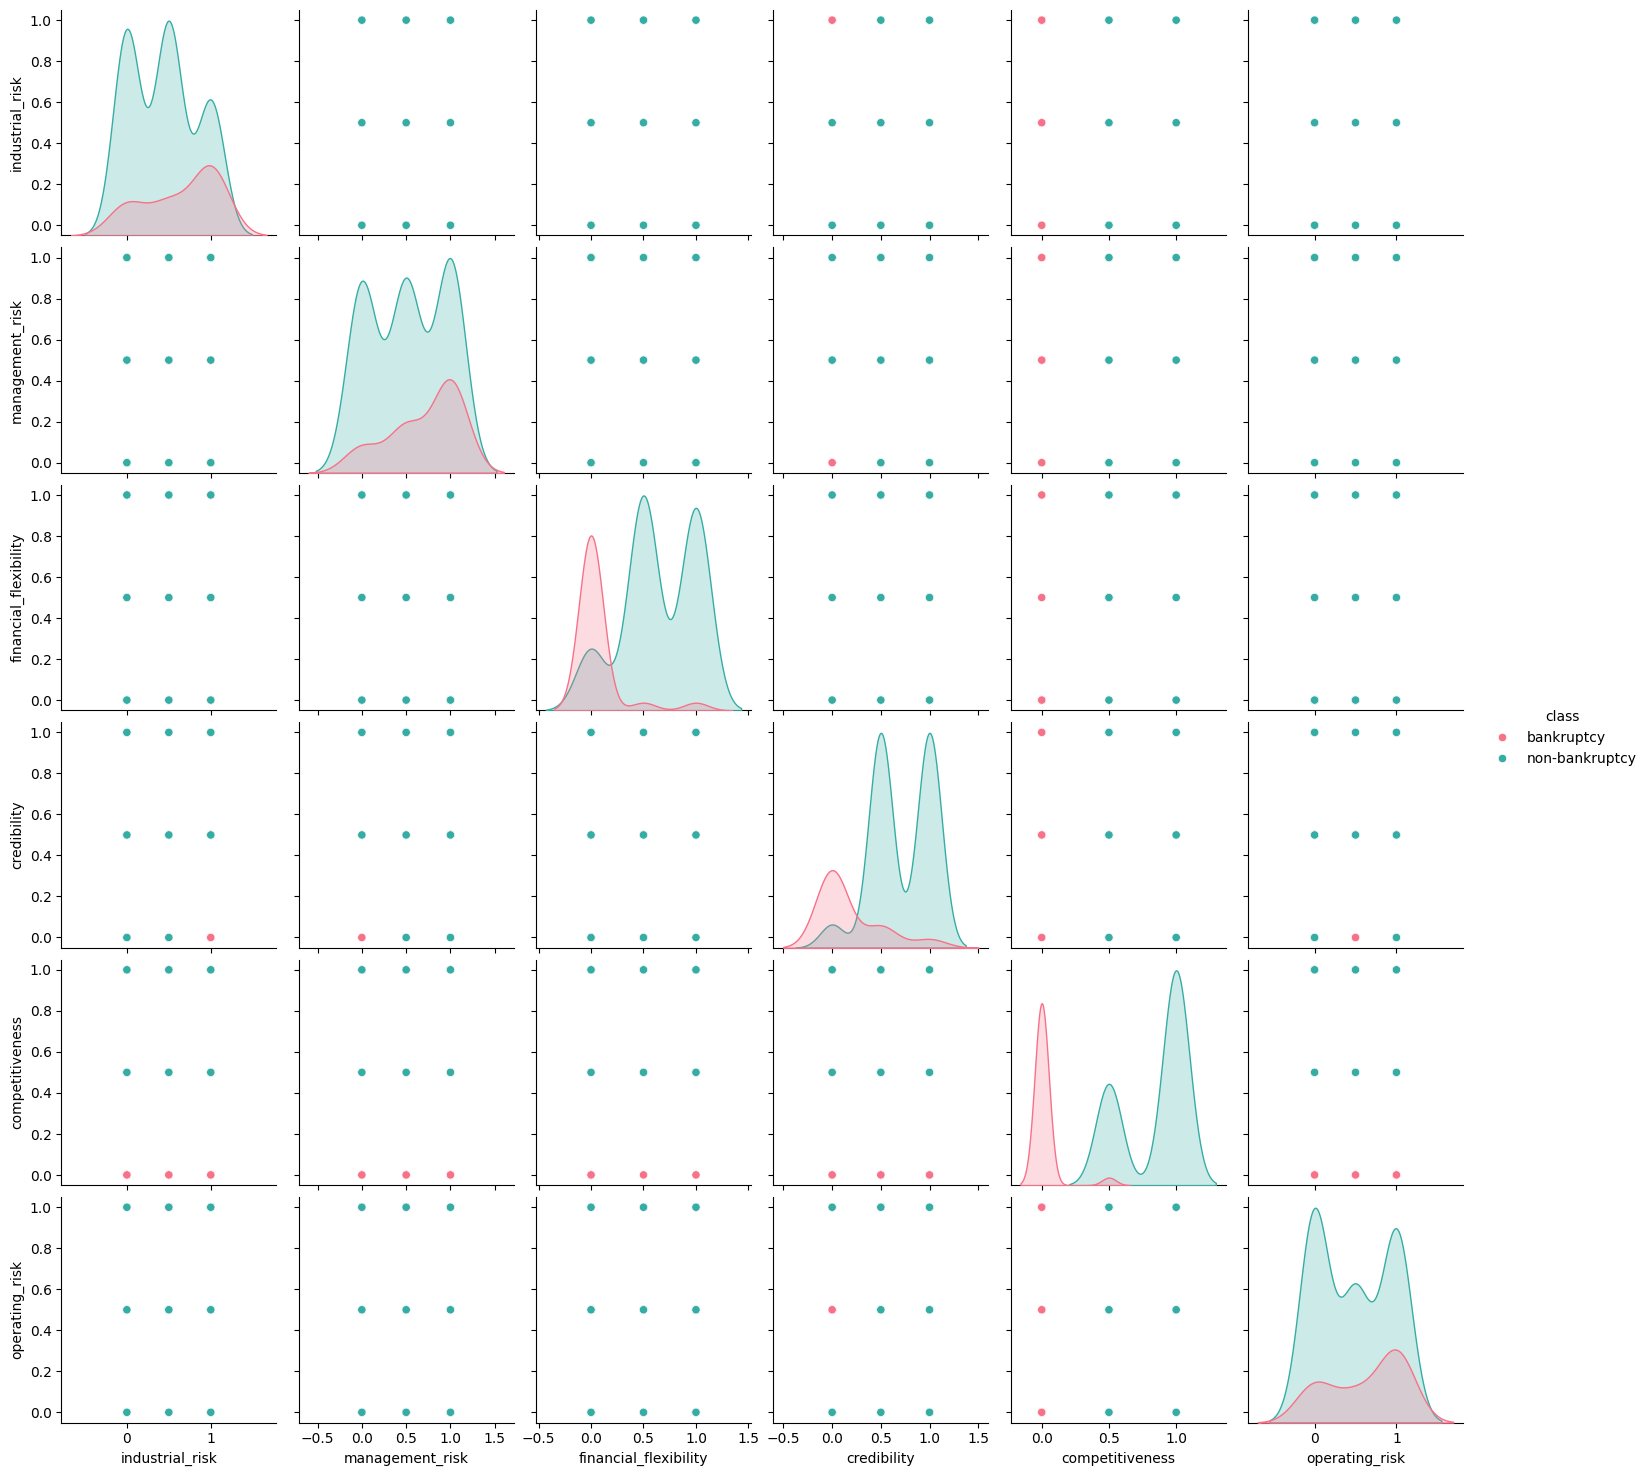

In [18]:
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(df[numeric_features.tolist() + ['class']], hue='class', palette='husl')
plt.show()


Scatter plots for every pair of numeric features, with points colored by class.

Diagonal shows histograms for each feature.

Model Building

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

# Split features and target
X = df.drop('class', axis=1)
y = df['class']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



# Summary

## Key Points
- **Workflow**: Applies a basic ML pipeline to a dataset df.
- **Target encoding**: **Encodes** the categorical target column class with a LabelEncoder.
- **Feature-target split**: Separates features X from the target y.
- **Train/validation split**: Divides data into training and validation sets in an **80/20** ratio using train_test_split with a fixed random_state=42 for reproducibility.
- **Next steps implied**: A downstream model (likely LogisticRegression) and evaluation metrics (e.g., classification_report, accuracy_score) are expected in subsequent steps.

Model Training

In [20]:

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy: 0.9523809523809523
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.94      1.00      0.97        16

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21



It describes training and evaluating a Logistic Regression model on a dataset. It trains a LogisticRegression model with an increased max_iter of 1000 on the training split, then uses it to predict the validation set. Evaluation results include printing the overall Accuracy via accuracy_score and a detailed performance breakdown through classification_report, providing metrics such as precision, recall, and F1-score for each class.

ROC Curve and AUC

Accuracy: 0.9523809523809523
Precision: 0.9411764705882353
Recall: 1.0
F1 Score: 0.9696969696969697
ROC-AUC Score: 1.0


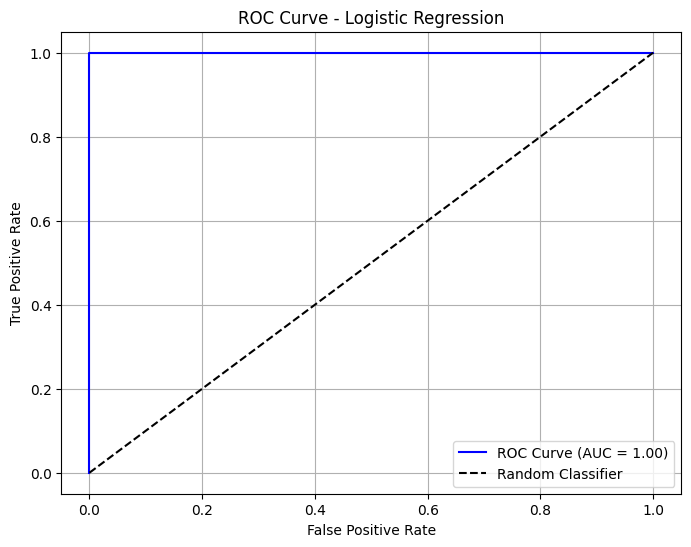

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities for ROC-AUC
y_proba = model.predict_proba(X_val)[:, 1]
y_pred = model.predict(X_val)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_val, y_proba))

# ROC curve
fpr, tpr, _ = roc_curve(y_val, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_val, y_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


It outlines evaluating a classification model (Logistic Regression) using multiple metrics: it computes accuracy, precision, and ROC-AUC by predicting probabilities and classes on the validation set, and attempts to plot a ROC curve with appropriate labeling and grid, culminating in displaying the plot.

Coefficient Interpretation

In [22]:
# Combine feature names with coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
feature_importance['Odds Ratio'] = np.exp(feature_importance['Coefficient'])
feature_importance.sort_values(by='Coefficient', ascending=False, inplace=True)
print(feature_importance)


                 Feature  Coefficient  Odds Ratio
4        competitiveness     3.027824   20.652243
2  financial_flexibility     1.602843    4.967135
3            credibility     1.273894    3.574746
1        management_risk    -0.264616    0.767501
5         operating_risk    -0.267055    0.765631
0        industrial_risk    -0.732052    0.480921


creates a feature importance table for a trained model by pairing each feature name with its corresponding coefficient, calculating the odds ratio as the exponential of the coefficient, and then sorting the results in descending order of the coefficient. The resulting table is printed to display each feature, its coefficient, and the corresponding odds ratio, highlighting which features most strongly influence the model’s predictions.

In [23]:
# 9. Save model
import joblib
joblib.dump(model, "bankruptcy_model.pkl")
print("Model saved as bankruptcy_model.pkl")

Model saved as bankruptcy_model.pkl


 describes saving a trained model to disk using Python's joblib library. It calls joblib.dump(model, "bankruptcy_model.pkl") to serialize and store the model in a file named bankruptcy_model.pkl.